# Importando todas as estruturas

In [40]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from src.bst import BinarySearchTree
from src.avl import AVLTree
from src.b_plus import BPlusTree
from src.tries import Trie, PatriciaTrie
from src.hash_table import HashTable
from src.visualizer import TreeVisualizer

viz = TreeVisualizer()

## Testes com a visualização da Binary Search Tree (BST):

### Exemplo 1: Não-autobalanceamento da árvore a partir do pior caso (o proximo valor da inserção é sempre maior que o anterior)

In [41]:
viz = TreeVisualizer()

#### 1. Inserindo elementos de uma lista crescente

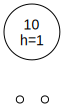

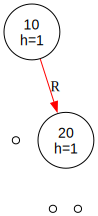

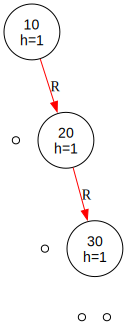

In [42]:
bst = BinarySearchTree()
data_bst = [10, 20, 30]
for num in data_bst:
    bst.insert(num)
    display(viz.visualize_binary_tree(bst))

#### 2. Inserindo elementos de uma lista decrescente

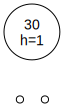

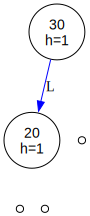

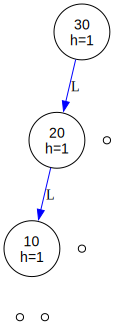

In [43]:
bst = BinarySearchTree()
for num in data_bst[::-1]:
    bst.insert(num)
    display(viz.visualize_binary_tree(bst))


#### Observa-se então que se os elementos forem inseridos em ordem (crescente ou decrescente) a árvore BST terá formato de uma lista encadeada.

### Exemplo 2: Remoção e visualização da substituição por sucessor

#### 1. Adicionando uma lista = [50, 30, 70, 60, 80] á árvore

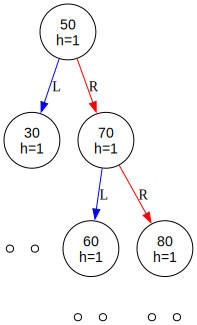

In [44]:
bst = BinarySearchTree()
data_bst = [50, 30, 70, 60, 80]

for num in data_bst:
    bst.insert(num)
viz.visualize_binary_tree(bst)


#### 2. Removendo 50 (root), o número a ocupar o espaço dela é o 60, seu sucessor

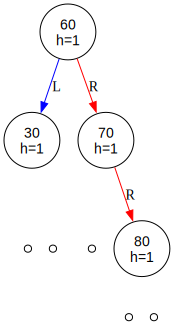

In [45]:
bst.remove(50)
viz.visualize_binary_tree(bst)

### Exemplo 3: Lista em zigue-zague: a árvore não é cheia e nem é lista ordenada, mas disposta em zigue-zague

#### 1. A lista a ser inserida é a seguinte: [50, 30, 40, 35]

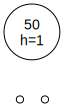

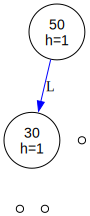

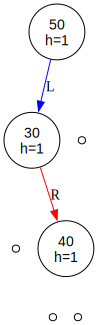

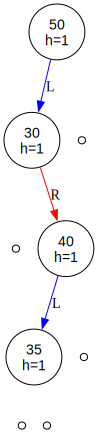

In [46]:
bst = BinarySearchTree()
data_bst = [50, 30, 40, 35]
for num in data_bst:
    bst.insert(num)
    display(viz.visualize_binary_tree(bst))

#### Vê-se então que quando os numeros a serem inseridos seguem uma 'ordem' de um numero sempre ser seguido por um sucessor e esse sucessor ser seguido por um antecessor dele mesmo, a árvore fica desbalanceada (não-cheia) e em formato de zigue-zague.

## Demonstrações na AVL Tree:

### Exemplo 1: Forçando Rotação Simples

#### Será inserido uma lista = [30, 20, 10]

#### 1. Insere-se primeiro o 30 e 20

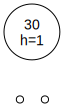

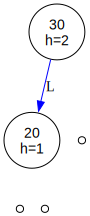

In [47]:
data_avl = [30, 20, 10]
avl = AVLTree()
avl.insert(data_avl[0])
display(viz.visualize_binary_tree(avl))
avl.insert(data_avl[1])
display(viz.visualize_binary_tree(avl))

#### Agora se insere o 10. Com a inserção, a árvore ficaria desbalanceada (fator de balanceamento = -2). Assim, automaticamente, o 20 deve ser ajustado para a raiz, por conta do autobalanceamento (rotação para a direita do 20)

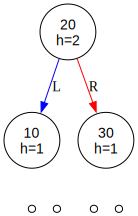

In [48]:
avl.insert(data_avl[2])
viz.visualize_binary_tree(avl)

### Exemplo 2: Forçando Rotação Dupla

#### Será inserido uma lista = [30, 10, 20]

#### 1. Inserem-se o 30 e o 10.

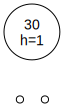

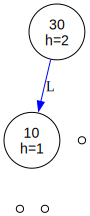

In [49]:
data_avl = [30, 10, 20]
avl = AVLTree()
avl.insert(data_avl[0])
display(viz.visualize_binary_tree(avl))
avl.insert(data_avl[1])
display(viz.visualize_binary_tree(avl))

#### 2. Nessa situação, quando o 20 for inserido, a árvore ficará formatada em zigue-zague (fator de balanceamento = 2 em 30 e = -1 no nó 10) - o que força uma rotação dupla à direita. Tornando 20 a nova raiz.

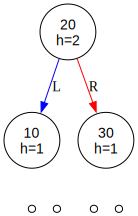

In [50]:
avl.insert(data_avl[2])
display(viz.visualize_binary_tree(avl))

#### Exemplo 3: Rebalanceamento pós-Remoção

#### Adicionando uma lista = [20, 10, 30, 40]. A árvore inicialmente está devidamente balanceada.

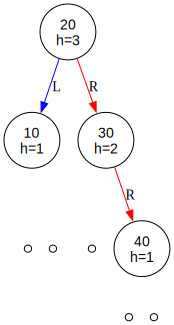

In [51]:
avl = AVLTree()
data_avl = [20, 10, 30, 40]
for num in data_avl:
    avl.insert(num)
viz.visualize_binary_tree(avl)

#### Caso eu remova 10, a árvore ficará desbalanceada. O fator de balanceamento no nó raiz será -3, o que força uma rotação à direita.

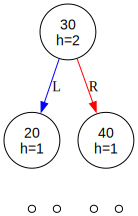

In [52]:
avl.remove(10)
viz.visualize_binary_tree(avl)

## Utilizando a estrutura da árvore B+

### Exemplo 1: Forçando split da página raiz

#### 1. Cria-se uma árvore de ordem 3 (M = 3), que implica que o número máximo de chaves é 2 de chaves = [10, 20, 30]

In [53]:
bplus = BPlusTree(3)
bplus_data = [10, 20, 30]
bplus.insert(bplus_data[0])
bplus.insert(bplus_data[1])
viz.visualize_bplus_tree(bplus)


#### 2. Quando eu adiciono o 30, o número de chaves estoura, o que torna preciso um split da página. A mediana dos dados (20) sobe e cria 2 filhos.

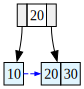

In [54]:
bplus.insert(bplus_data[2])
viz.visualize_bplus_tree(bplus)

### Exemplo 2: Cascade Split (o split da folha força o pai dela a se dividir tambem)

#### 1. Insere-se uma lista [10, 20, 30, 40, 50]. Na verdade, primeiramente adicionamos apenas os 4 primeiros.

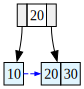

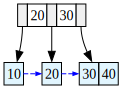

In [55]:
bplus = BPlusTree(3)
bplus_data = [10, 20, 30, 40]
for num in bplus_data:
    bplus.insert(num)
    display(viz.visualize_bplus_tree(bplus))

#### 2. Ao adicionar o 50, ele estoura a folha da direita, o que força um split dele. Entretanto, ao splitar esse ponteiro e subir a mediana (40), o ponteiro pai estoura também, o que, da mesma forma, força um split e a sua mediana (30) subir e formar a nova raiz da árvore.

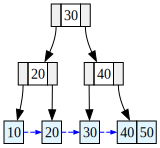

In [56]:
bplus.insert(50)
viz.visualize_bplus_tree(bplus)

### Exemplo 3: Demonstração do Merge (usando a mesma árvore do problema anterior, removemos o 40 e o 50)

#### 1. Removendo o 40, a folha da direita ficará apenas com o dado 50.

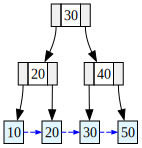

In [57]:
bplus.remove(40)
viz.visualize_bplus_tree(bplus)

#### Removendo o 50, eu fico com um numero de chaves nulo na ultima folha da direita, o que a faz desaparecer. Porém, fazendo isso, o seu parent (40) ficou com menos ponteiros que o permitido (< 2). Ele tenta se fundir com o seu irmão 20, mas ele também nao pode ceder. Então, o 30 (raiz) desce, o que torna agora o 40 desprezível (servia apenas como separador) e faz com que exista um merge entre os novos nós internos 20 e 30 com 3 ponteiros. Além disso, importante salientar que a árvore desceu um nível a partir da descida do 30.

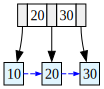

In [58]:
bplus.remove(50)
(viz.visualize_bplus_tree(bplus))